#### 1. Import the Required libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Load the datasets
main_df = pd.read_csv("spam.csv",encoding = "Windows-1252")

In [2]:
main_df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
main_df.shape

(5572, 5)

#### 2. Data Cleaning

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#### Remove unnecessary columns
main_df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [6]:
### Change the name of columns
main_df.rename(columns = {'v1':'output','v2':'text'}, inplace = True)

In [7]:
### Convert the text of output to the 0 and 1 using Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
main_df['output'] = encoder.fit_transform(main_df['output'])

In [9]:
main_df

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
### Check for null values
main_df.isnull().sum()

output    0
text      0
dtype: int64

In [11]:
#### Check for duplicate values
main_df.duplicated().sum()

np.int64(403)

In [12]:
### Remove duplicated values
main_df = main_df.drop_duplicates(keep = "first")

In [13]:
main_df.duplicated().sum()

np.int64(0)

In [14]:
main_df.shape

(5169, 2)

#### 3. Exploratory Data Analysis

In [15]:
### Check the data distribution of spam and ham
main_df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

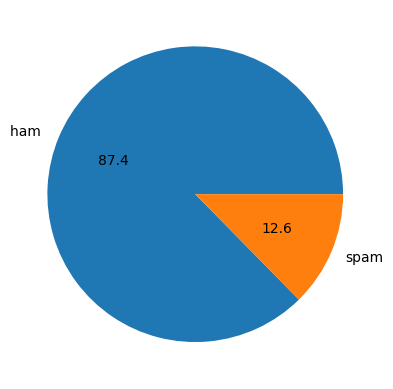

In [16]:
### Check the quantity of spam and not spam
plt.pie(main_df['output'].value_counts(),labels = ['ham ','spam'],autopct ="%0.1f")
plt.show()

##### By above result we know that data is not balanced

In [17]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###### Now for better Analysis check the number of words, numbers and sentences

In [18]:
main_df['character_number'] = main_df['text'].apply(len)

C:\Users\User\AppData\Local\Temp\ipykernel_18468\693625993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['character_number'] = main_df['text'].apply(len)


In [19]:
main_df

,output,text,character_number
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
main_df["words_number"] = main_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_18468\4078659273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df["words_number"] = main_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [21]:
main_df.head(5)

,output,text,character_number,words_number
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
main_df['sentence_number'] = main_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_18468\628801250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['sentence_number'] = main_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [23]:
main_df

,output,text,character_number,words_number,sentence_number
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
#### Check the description of characters, words and sentences numbers
main_df[['character_number','words_number','sentence_number']].describe()

,character_number,words_number,sentence_number
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
### Analysis of only ham output
main_df[main_df['output'] == 0][['character_number','words_number','sentence_number']].describe()

,character_number,words_number,sentence_number
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#### Analysis of only spam output
main_df[main_df['output'] == 1][['character_number','words_number','sentence_number']].describe()

,character_number,words_number,sentence_number
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### Get the Minimum and Maximum text

In [27]:
# Find the index of the row with the maximum 'character_number'
max_index = main_df['character_number'].idxmax()

# Extract the 'text' value from the row with the maximum 'character_number'
max_text = main_df.loc[max_index, 'text']
len(max_text),max_text

(910,
 "For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..")

In [28]:
### Find the index of the row with the minimum "character_number"
min_index = main_df['character_number'].idxmin()

min_text = main_df.loc[min_index,'text']
min_text

'Ok'

<Axes: xlabel='character_number', ylabel='Count'>

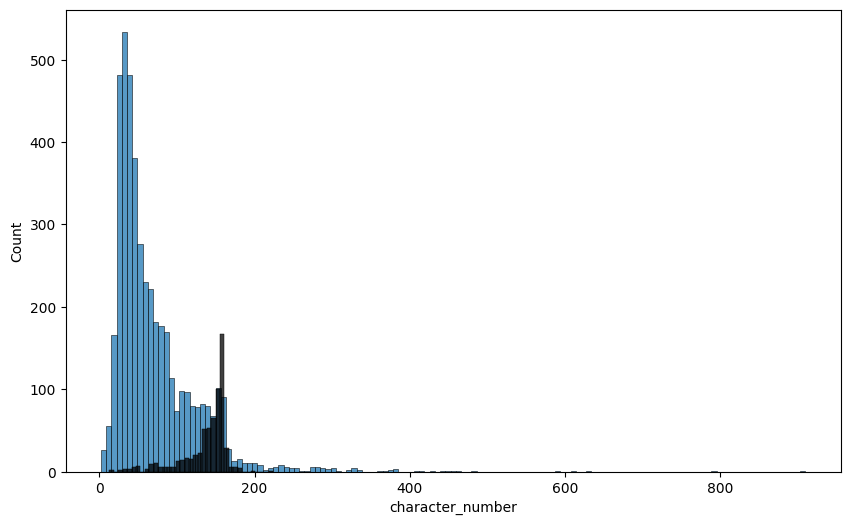

In [29]:
### Plot the number of characters of ham and spam in histogram
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(main_df[main_df['output'] == 0]['character_number']) ### ham
sns.histplot(main_df[main_df['output'] == 1]['character_number'],color = 'black') ### spam

<Axes: xlabel='words_number', ylabel='Count'>

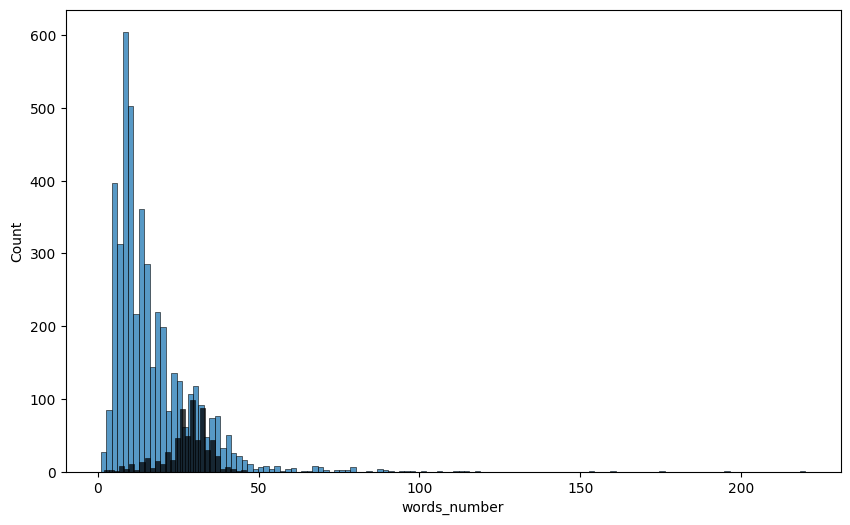

In [30]:
### Plot the number of words of ham and spam in histogram
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(main_df[main_df['output'] == 0]['words_number']) ### ham
sns.histplot(main_df[main_df['output'] == 1]['words_number'],color = 'black') ### spam

<Axes: xlabel='sentence_number', ylabel='Count'>

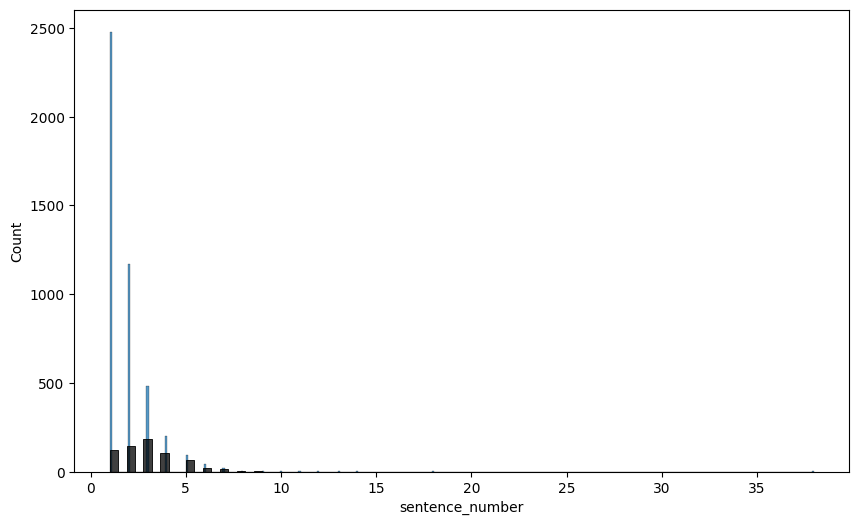

In [31]:
### Plot the number of sentence of ham and spam in histogram
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(main_df[main_df['output'] == 0]['sentence_number']) ### ham
sns.histplot(main_df[main_df['output'] == 1]['sentence_number'],color = 'black') ### spam

#### From the above results we can conclude that the spam messages are too long whereas ham messages are short

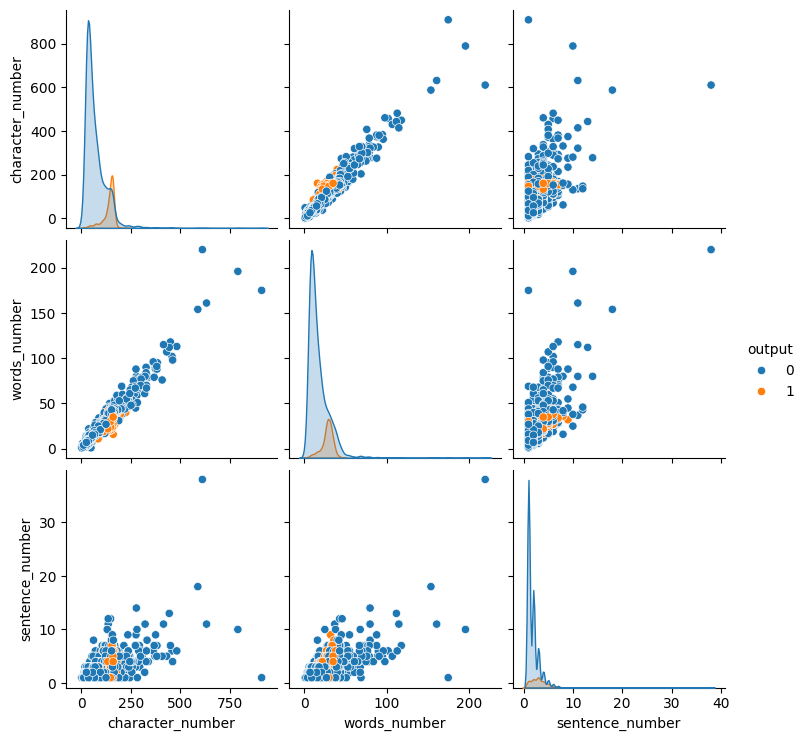

In [32]:
### Visualize the relationships between the columns using pairplots
sns.pairplot(main_df,hue = "output")

In [33]:
only_numeric_data = main_df.drop(columns=['text'])

<Axes: >

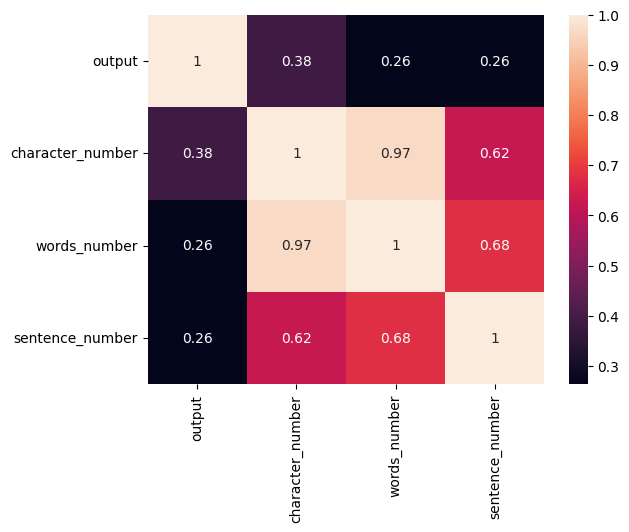

In [34]:
sns.heatmap(only_numeric_data.corr(),annot= True)

### 4. Text Preprocessing

1. Lowercase the text
2. Tokenize the text
3. Removing special characters
4. Removing stop words and punctuations
5. Stemming


In [35]:
from nltk.corpus import stopwords
import string

def text_preprocessing(text:str)->str:
    """
    Proprocessing the text for NLP model
    Args:
        text: Input raw text
    Outputs:
        text: Preprocessed text
    """
    text = text.lower() #### Lowercase the text
    text = nltk.word_tokenize(text) #### Tokenize the text
    converted  = []
    for i in text:
        if i.isalpha():
            converted.append(i) ##### Remove special characters
            
    ### Now remove the stopwords and punctuations
    new_text = converted[:] ### clone or copy the list
    converted.clear()
    
    for i in new_text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            converted.append(i)

    latest_text = converted[:]
    converted.clear()
    for i in latest_text:
        converted.append(ps.stem(i))
        
    return " ".join(converted)

In [36]:
### Get the stopwords
from nltk.corpus import stopwords
import string
# stopwords.words("english")

### Get the punctuations
string.punctuation

#### Stemming the words 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("Caring")

'care'

In [37]:
main_df['text'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [38]:
text_preprocessing(main_df['text'][9])

'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free'

#### Apply the text preprocessing function to the whole datasets

In [39]:
main_df['transformed_text'] = main_df['text'].apply(text_preprocessing)

C:\Users\User\AppData\Local\Temp\ipykernel_18468\1086040645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['transformed_text'] = main_df['text'].apply(text_preprocessing)


In [40]:
main_df.head()

,output,text,character_number,words_number,sentence_number,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 10. Create a WordCloud to display the frequent text in bigger size

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500,background_color='black',min_font_size=10) 

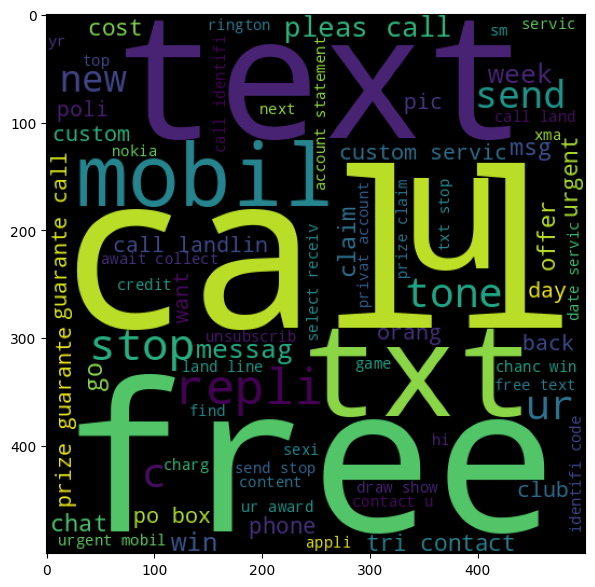

In [51]:
#### Generate a cloud word for spam 
spam_wc = wc.generate(main_df[main_df['output'] == 1]['transformed_text'].str.cat(sep = " ")) 
#### .str.cat() method concatenates all the strings in the transformed_text column into a single string.
#### sep=" " ensures that the individual strings are joined with a space between them.
plt.figure(figsize = (10,7))
plt.imshow(spam_wc)

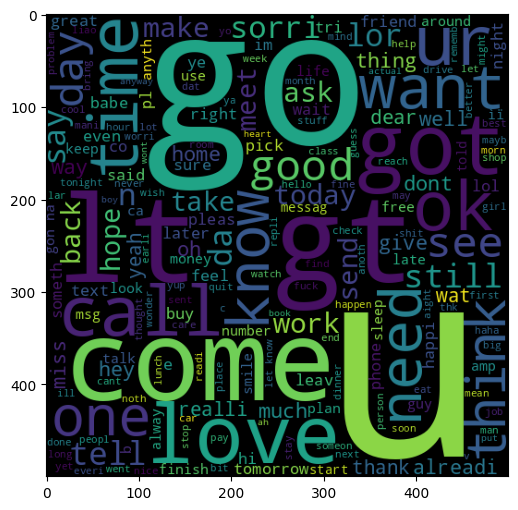

In [54]:
#### Generate a cloudword for ham
ham_wc = wc.generate(main_df[main_df['output'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (10,6))
plt.imshow(ham_wc)

#### 11. Now Extract the Top 30 words that are mostly used in Spam and Ham

In [55]:
main_df.head()

,output,text,character_number,words_number,sentence_number,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
#### Extract all the transformed text for spam 
spam_words = []
for sms in main_df[main_df['output'] == 1]['transformed_text'].to_list():
    for word in sms.split():
        spam_words.append(word)

In [69]:
len(spam_words)

8170

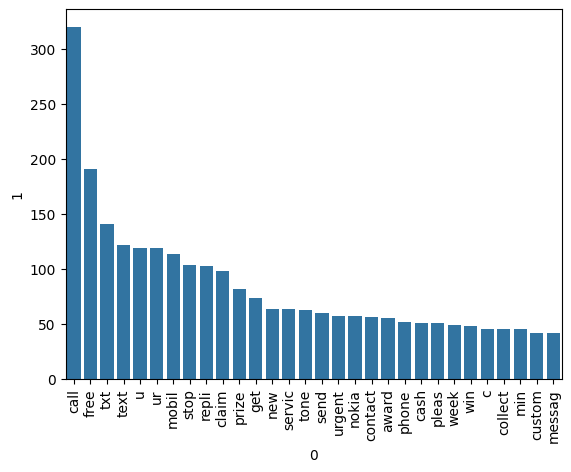

In [81]:
### Now extract the top 30 frequent words with their visualization
from collections import Counter
most_frequent_spam_word = pd.DataFrame(Counter(spam_words).most_common(30))
sns.barplot(x = most_frequent_spam_word[0],y = most_frequent_spam_word[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [87]:
### Extract the most frequent words of ham
ham_words = []
for sentence in main_df[main_df['output'] == 0]['transformed_text']:
    for each_word in sentence.split():
        ham_words.append(each_word)

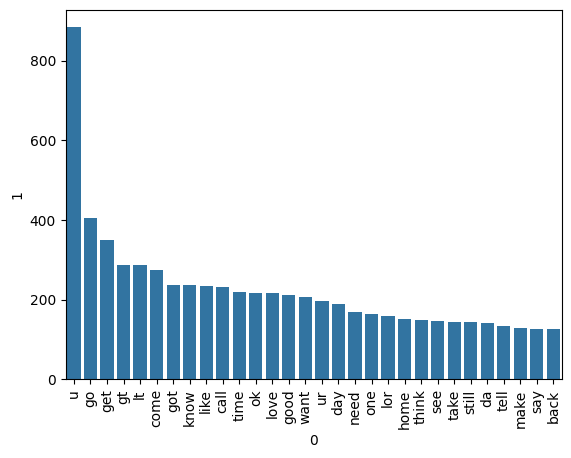

In [91]:
from collections import Counter
most_frequent_ham_words = pd.DataFrame(Counter(ham_words).most_common(30))
sns.barplot(x = most_frequent_ham_words[0], y = most_frequent_ham_words[1])
plt.xticks(rotation = 'vertical')
plt.show()